https://py-eddy-tracker.readthedocs.io/en/stable/python_module/02_eddy_identification/pet_eddy_detection.html

Using subset of MIOST from: 
<!-- file:// -->
[2025-02-10_SWOT_L4_MIOST_test02.ipynb](/Users/Gomez023/Postdoc/develop/FaSt-SWOT/SWOT/L4_data/MIOST/2025-02-10_SWOT_L4_MIOST_test02.ipynb)

from: 2025-03-24_eddy-tracking_SWOT_L4_MIOST_DUACS-NRT_COMP_test02.ipynb

In [1]:
# venv_py_eddy_tracker_04


In [2]:
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

import cartopy.crs as ccrs
import cartopy

import numpy as np

from glob import glob
import os

from py_eddy_tracker.observations.observation import EddiesObservations


In [3]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

In [4]:
nyears = [2023, 2024]

nmonths_23 = [8, 9, 10, 11, 12]
nmonths_24 = [1, 2, 3, 4 , 5] #, 6, 7, 8, 9, 10, 11, 12]


# Loading data:

In [5]:
nyear = 2024

nmonth = 2


## MIOST:

In [6]:
indir_miost = "/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/"
indir = indir_miost + 'subset/'


In [7]:
data_paths_MIOST = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))
# data_paths_MIOST_v201 = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))
data_paths_MIOST

['/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240201_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240202_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240203_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240204_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240205_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240206_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/

In [8]:
outdir = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/"

In [9]:
data_path  = data_paths_MIOST[19]
data_path

'/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240220_sub.nc'

In [10]:
a_names_MIOST = []
c_names_MIOST = []

for data_path in data_paths_MIOST:
   date = datetime(int(data_path[-15:-11]), int(data_path[-11:-9]),
                    int(data_path[-9:-7]))
   print(date)
   
   a_name = outdir + 'a_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'
   c_name = outdir + 'c_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'
   
   a_names_MIOST.append(a_name)
   c_names_MIOST.append(c_name)

2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00
2024-02-20 00:00:00
2024-02-21 00:00:00
2024-02-22 00:00:00
2024-02-23 00:00:00
2024-02-24 00:00:00
2024-02-25 00:00:00
2024-02-26 00:00:00
2024-02-27 00:00:00
2024-02-28 00:00:00
2024-02-29 00:00:00


In [11]:
a_names_MIOST

['/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240201.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240202.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240203.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240204.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240205.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240206.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240207.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240208.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240209.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240210.nc',
 '/Users/Gomez023/Ne

## Loading all eddies into same object:
https://py-eddy-tracker.readthedocs.io/en/stable/python_module/02_eddy_identification/pet_statistics_on_identification.html

In [12]:
all_a_MIOST = EddiesObservations.concatenate(
    [EddiesObservations.load_file(ff) for ff in a_names_MIOST]
)

In [13]:
all_c_MIOST = EddiesObservations.concatenate(
    [EddiesObservations.load_file(ff) for ff in c_names_MIOST]
)

In [14]:
all_a_MIOST

/opt/anaconda3/envs/venv_py-eddy-tracker_04/lib/python3.10/site-packages/pyEddyTracker-0+untagged.753.g8fe5bf1-py3.10.egg/py_eddy_tracker/observations/observation.py:305: RuntimeWarning: invalid value encountered in divide
  v /= hist_numba(x, bins=bins)[0]


| 555 observations from 27059.0 to 27087.0 (29.0 days, ~19 obs/day)
    |   Speed area      : 0.06 Mkm²/day
    |   Effective area  : 0.10 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      19.28     19.64     12.79      6.49      3.96     19.10     18.74
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       7.39     51.71     24.50     13.87      2.52      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       5.59     37.84     27.21     13.69      8.83      6.49      0.36      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.00     15.00     60.00     90.00
        Percent of eddies         :       0.00      0.00      0.00    100.00      0.00
        Percent of speed area     :       0.00      0.00      0.00    100.00      0.00
        Percent of effective area :       0.00      0.00      0.00    100.00      0.00
        Mean speed radius (km)    :        nan       nan       nan     29.98       nan
        Mean effective radius (km):        nan       nan       nan     38.18       nan
        Mean amplitude (cm)       :        nan       nan       nan      5.51       nan

In [15]:
all_c_MIOST

| 521 observations from 27059.0 to 27087.0 (29.0 days, ~18 obs/day)
    |   Speed area      : 0.04 Mkm²/day
    |   Effective area  : 0.05 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      35.32     23.42     17.08      8.83      7.49      7.87      0.00
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       9.98     60.46     23.22      4.22      2.11      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       9.79     52.40     22.46     10.17      5.18      0.00      0.00      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.00     15.00     60.00     90.00
        Percent of eddies         :       0.00      0.00      0.00    100.00      0.00
        Percent of speed area     :       0.00      0.00      0.00    100.00      0.00
        Percent of effective area :       0.00      0.00      0.00    100.00      0.00
        Mean speed radius (km)    :        nan       nan       nan     26.89       nan
        Mean effective radius (km):        nan       nan       nan     29.24       nan
        Mean amplitude (cm)       :        nan       nan       nan      2.11       nan

## Load DUACS-NRT:

In [16]:
indir_duacs_nrt = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/"

data_paths_DUACS_NRT = sorted(glob(indir_duacs_nrt + "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))


In [17]:
a_names_DUACS_NRT = []
c_names_DUACS_NRT = []

for data_path_DUACS_NRT in data_paths_DUACS_NRT:
   date = datetime(int(data_path_DUACS_NRT[-15:-11]), int(data_path_DUACS_NRT[-11:-9]),
                int(data_path_DUACS_NRT[-9:-7]))
   print(date)
   
   a_name_DUACS_NRT = outdir + 'a_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
   c_name_DUACS_NRT = outdir + 'c_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
   
   a_names_DUACS_NRT.append(a_name_DUACS_NRT)
   c_names_DUACS_NRT.append(c_name_DUACS_NRT)

2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00
2024-02-20 00:00:00
2024-02-21 00:00:00
2024-02-22 00:00:00
2024-02-23 00:00:00
2024-02-24 00:00:00
2024-02-25 00:00:00
2024-02-26 00:00:00
2024-02-27 00:00:00
2024-02-28 00:00:00
2024-02-29 00:00:00


## Loading all eddies into same object:
https://py-eddy-tracker.readthedocs.io/en/stable/python_module/02_eddy_identification/pet_statistics_on_identification.html

In [18]:

all_a_DUACS_NRT = EddiesObservations.concatenate(
    [EddiesObservations.load_file(ff) for ff in a_names_DUACS_NRT]
)

In [19]:
all_c_DUACS_NRT = EddiesObservations.concatenate(
    [EddiesObservations.load_file(ff) for ff in c_names_DUACS_NRT]
)

In [20]:
all_a_DUACS_NRT

| 391 observations from 27059.0 to 27087.0 (29.0 days, ~13 obs/day)
    |   Speed area      : 0.05 Mkm²/day
    |   Effective area  : 0.08 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      20.20     16.37      8.18      7.16      9.46     17.65     20.97
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       4.86     43.22     31.97     16.37      3.58      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       4.86     31.97     33.50     10.74      8.18     10.23      0.51      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.00     15.00     60.00     90.00
        Percent of eddies         :       0.00      0.00      0.00    100.00      0.00
        Percent of speed area     :       0.00      0.00      0.00    100.00      0.00
        Percent of effective area :       0.00      0.00      0.00    100.00      0.00
        Mean speed radius (km)    :        nan       nan       nan     33.54       nan
        Mean effective radius (km):        nan       nan       nan     40.56       nan
        Mean amplitude (cm)       :        nan       nan       nan      6.00       nan

In [21]:
all_c_DUACS_NRT

| 496 observations from 27059.0 to 27087.0 (29.0 days, ~17 obs/day)
    |   Speed area      : 0.05 Mkm²/day
    |   Effective area  : 0.06 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      29.84     25.81     18.35     12.10      6.65      6.85      0.40
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       7.26     51.61     28.43     11.29      1.41      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       7.06     46.98     26.21     15.93      3.83      0.00      0.00      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.00     15.00     60.00     90.00
        Percent of eddies         :       0.00      0.00      0.00    100.00      0.00
        Percent of speed area     :       0.00      0.00      0.00    100.00      0.00
        Percent of effective area :       0.00      0.00      0.00    100.00      0.00
        Mean speed radius (km)    :        nan       nan       nan     29.44       nan
        Mean effective radius (km):        nan       nan       nan     31.68       nan
        Mean amplitude (cm)       :        nan       nan       nan      2.25       nan

# Plotting all eddies:

In [22]:
def start_axes_map(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
    
    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

In [23]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map_subplots(title, nax): 
    """
    title = "xx ()"
    nax, e.g. 121
    """
    # plt.figure(figsize=(14,5)) #(17,5)
    ax = plt.subplot(nax, projection=ccrs.PlateCarree())
    # ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])

    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

## MIOST

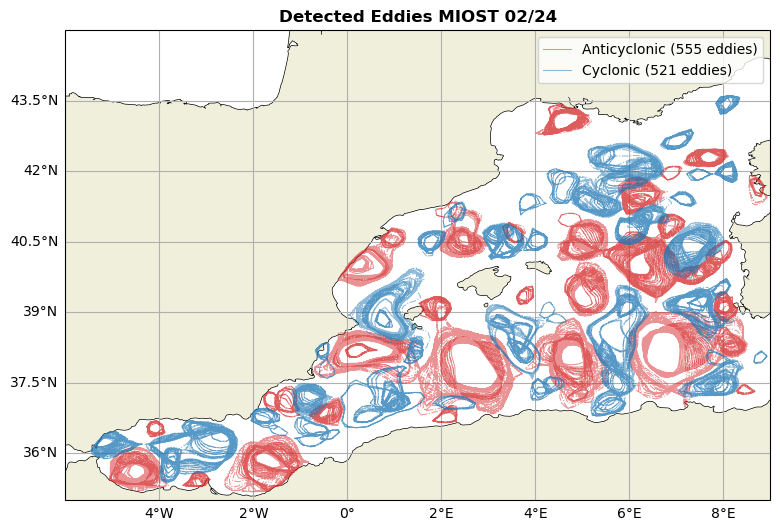

In [24]:
ax = start_axes_map("Detected Eddies MIOST 02/24")
ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

all_a_MIOST.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
all_c_MIOST.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
ax.legend()
update_axes(ax)

# --> which contour is it?

## DUACS-NRT

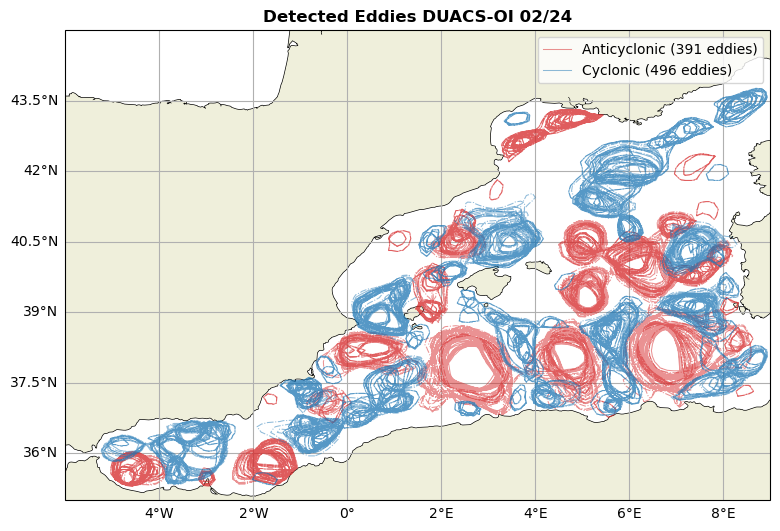

In [25]:
ax = start_axes_map("Detected Eddies DUACS-OI 02/24") # NRT
ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

all_a_DUACS_NRT.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
all_c_DUACS_NRT.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
ax.legend()
update_axes(ax)

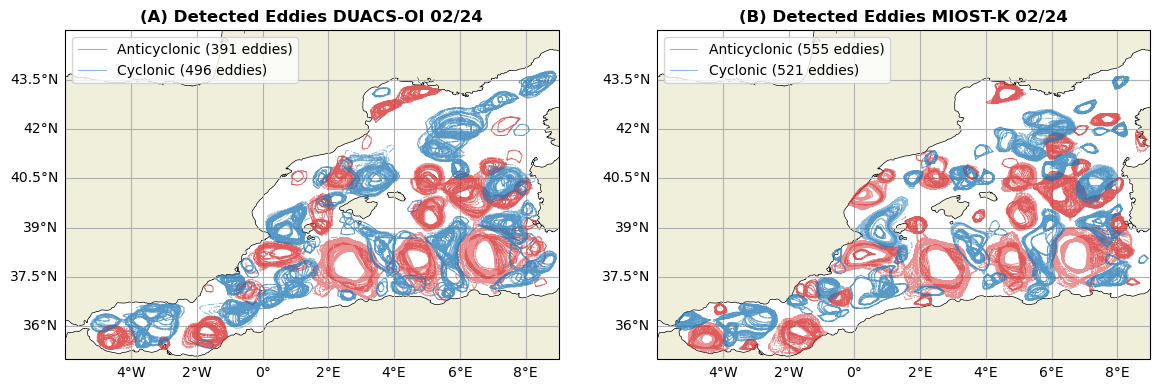

In [26]:
plt.figure(figsize=(14,5))
ax = start_axes_map_subplots("(A) Detected Eddies DUACS-OI 02/24", 121) #  NRT
ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

all_a_DUACS_NRT.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
all_c_DUACS_NRT.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)

ax.legend(loc=2)
update_axes(ax)

ax = start_axes_map_subplots("(B) Detected Eddies MIOST-K 02/24", 122) #  v2.0.1
ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

all_a_MIOST.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
all_c_MIOST.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)

ax.legend(loc=2)
update_axes(ax)
# ndate = a_name_MIOST_v201.split('/')[-1].split('_')[-1].split('.')[0]
# plt.suptitle("Detected Eddies on " + ndate)

# Loop:

In [27]:
savefigs_dir = "/Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/"

figname_root = "DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id"

* 2024:

In [28]:
a_names_MIOST[0].split('/')[-1].split('_')[-1].split('.')[0]

'20240201'

Saved /Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id_202401.png


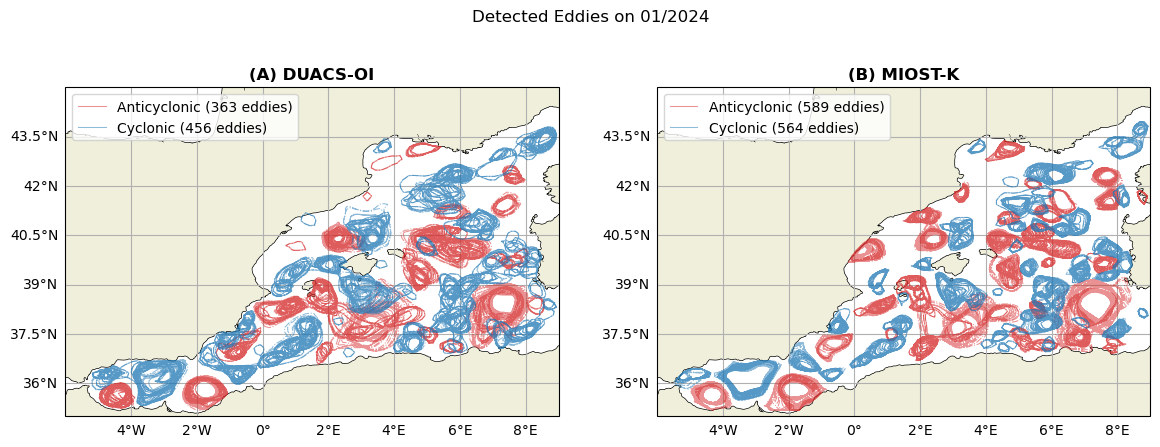

Saved /Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id_202402.png


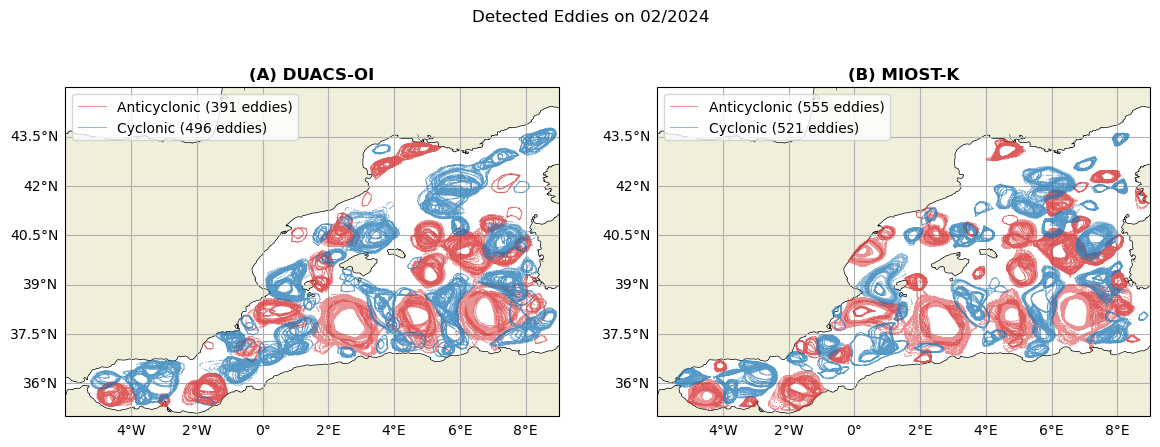

Saved /Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id_202403.png


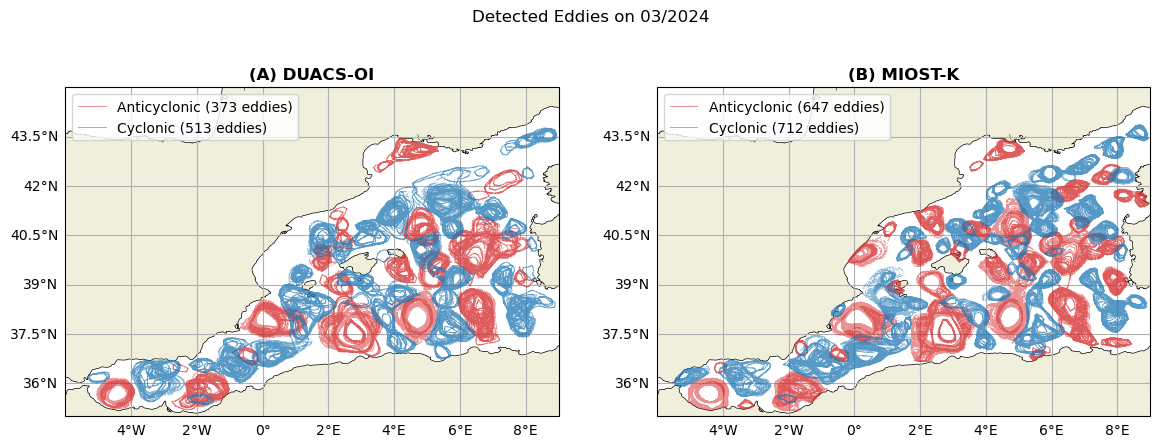

Saved /Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id_202404.png


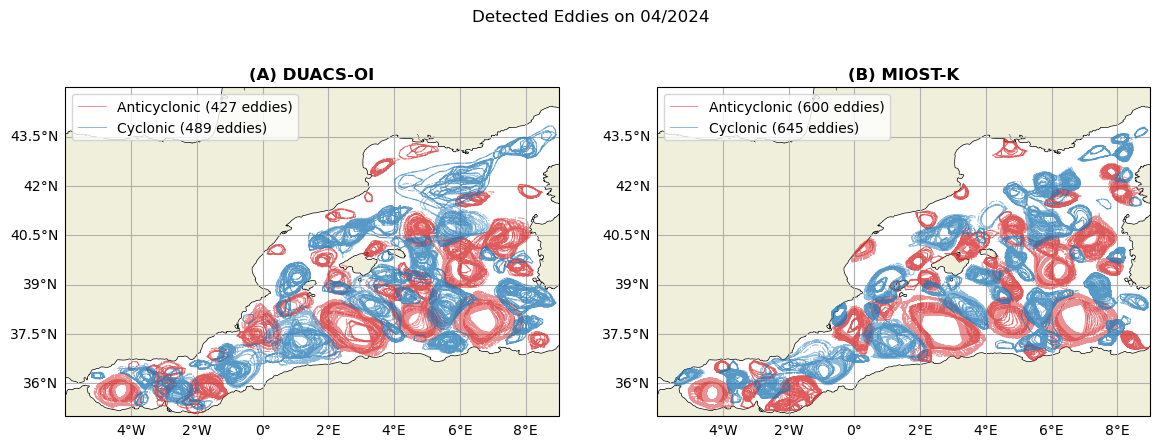

Saved /Users/Gomez023/Nextcloud/Projects/OSR10/Figures/eddy-tracker/DUAC-OI_NRT_vs_MIOST-K_v2.0.1_eddy_id_202405.png


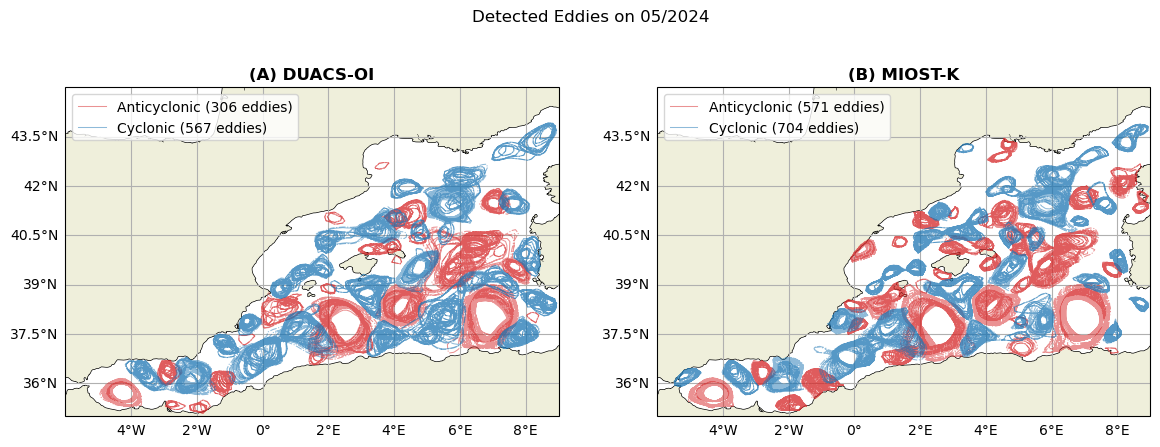

In [29]:
for nmonth in nmonths_24:
    ############
    ## Loading data:
    ### DUACS
    data_paths_DUACS_NRT = sorted(glob(indir_duacs_nrt + "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))

    a_names_DUACS_NRT = []
    c_names_DUACS_NRT = []

    for data_path_DUACS_NRT in data_paths_DUACS_NRT:
        date = datetime(int(data_path_DUACS_NRT[-15:-11]), int(data_path_DUACS_NRT[-11:-9]),
                        int(data_path_DUACS_NRT[-9:-7]))
        
        a_name_DUACS_NRT = outdir + 'a_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
        c_name_DUACS_NRT = outdir + 'c_DUACS-NRT_' + date.strftime('%Y%m%d') + '.nc'
        
        a_names_DUACS_NRT.append(a_name_DUACS_NRT)
        c_names_DUACS_NRT.append(c_name_DUACS_NRT)

    all_a_DUACS_NRT = EddiesObservations.concatenate(
        [EddiesObservations.load_file(ff) for ff in a_names_DUACS_NRT]
    )
    
    all_c_DUACS_NRT = EddiesObservations.concatenate(
        [EddiesObservations.load_file(ff) for ff in c_names_DUACS_NRT]
    )

    ### MIOST-K:
    data_paths_MIOST = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + str(nmonth).zfill(2) + "*_sub.nc"))

    a_names_MIOST = []
    c_names_MIOST = []

    for data_path in data_paths_MIOST:
        date = datetime(int(data_path[-15:-11]), int(data_path[-11:-9]),
                            int(data_path[-9:-7]))
                
        a_name = outdir + 'a_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'
        c_name = outdir + 'c_MIOST_v2.0.1_' + date.strftime('%Y%m%d')+'.nc'  
        
        a_names_MIOST.append(a_name)
        c_names_MIOST.append(c_name)

    all_a_MIOST = EddiesObservations.concatenate(
        [EddiesObservations.load_file(ff) for ff in a_names_MIOST]
    )
    all_c_MIOST = EddiesObservations.concatenate(
        [EddiesObservations.load_file(ff) for ff in c_names_MIOST]
    )

    ############
    # Plot:
    plt.figure(figsize=(14,5))
    ax = start_axes_map_subplots("(A) DUACS-OI", 121) # NRT
    ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

    all_a_DUACS_NRT.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
    all_c_DUACS_NRT.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)

    ax.legend(loc=2)
    update_axes(ax)

    ax = start_axes_map_subplots("(B) MIOST-K", 122) #  v2.0.1
    ax.set_xlim(-6, 9), ax.set_ylim(35., 45.)

    all_a_MIOST.display(ax, color="C3", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)
    all_c_MIOST.display(ax, color="C0", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10, transform=ccrs.PlateCarree(), alpha=.5)

    ax.legend(loc=2)
    update_axes(ax)    

    # Save the figure
    ndate = "2024" + str(nmonth).zfill(2)
    # ndate = a_name_MIOST_v201.split('/')[-1].split('_')[-1].split('.')[0]
    plt.suptitle("Detected Eddies on " + str(nmonth).zfill(2) + "/2024")

    output_filename = savefigs_dir + figname_root + f"_{ndate}.png"
    plt.savefig(output_filename, dpi=300, bbox_inches="tight");  print(f"Saved {output_filename}")

    plt.show()
